# Turkish crowdfunding startups
## (Pipeline version)
Оригінальний датасет: https://archive.ics.uci.edu/dataset/1025/turkish+crowdfunding+startups

Назви ознак у перекладеній версії:

- `id`: The unique identifier of the project.
- `platform`: The crowdfunding platform where the project is hosted.
- `funding_type`: Type of crowdfunding (e.g., reward, donation).
- `category`: Category of the project.
- `funding_method`: Funding method (e.g., all or nothing).
- `project_name`: Project name.
- `project_owner_name`: Name of the project owner.
- `project_owner_gender`: Gender of the project owner.
- `project_owner_backed`: Number of projects the owner has backed.
- `project_owner_subscribed`: Number of projects the owner has subscribed to.
- `owner_n_projects`: Number of projects owned by the project owner.
- `owner_in_teams`: Number of teams the project owner is part of.
- `location`: Location of the project owner.
- `region`: Region of the project.
- `year`: Year the project was launched.
- `project_start_date`: Start date of the project.
- `project_end_date`: End date of the project.
- `project_duration`: Duration of the project in days.
- `has_video`: Whether the project has a promotional video.
- `video_length`: Length of the promotional video.
- `images`: Number of images related to the project.
- `faq`: Whether the project has a Frequently Asked Questions (FAQ) section.
- `updates`: Number of updates for the project.
- `comments`: Number of comments on the project.
- `backers`: Number of backers for the project.
- `rewards`: Number of rewards offered in the project.
- `team_size`: Number of people in the project team.
- `has_website`: Whether the project has a website.
- `has_social_media`: Whether the project has social media accounts.
- `n_social_media`: Number of social media accounts for the project.
- `sm_followers`: Number of social media followers for the project.
- `tags`: Number of tags used in the project description.
- `n_words`: Number of words in the project description.
- `description`: Description of the project.
- `funding_target`: Target amount of funding for the project.
- `funding_received`: Amount of funding collected for the project.
- `funding_percent`: Percentage of the target amount achieved.
- `success`: Success status of the project (successful or unsuccessful).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as pp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector

In [2]:
data = pd.read_csv('datasets/startups_in_turkey.csv', index_col=0)

## EDA

In [3]:
data.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
id,1628.0,814.500000,470.107435,1.0,407.75,814.50,1221.25,1628.0
project_owner_backed,1628.0,0.429361,2.225029,0.0,0.00,0.00,0.00,31.0
project_owner_subscribed,1628.0,0.000614,0.024784,0.0,0.00,0.00,0.00,1.0
owner_n_projects,1628.0,1.165848,0.710455,1.0,1.00,1.00,1.00,7.0
owner_in_teams,1628.0,0.052826,0.244744,0.0,0.00,0.00,0.00,4.0
year,1628.0,2018.042383,2.054583,2011.0,2017.00,2019.00,2020.00,2021.0
project_duration,1628.0,52.004914,15.294526,0.0,45.00,60.00,60.00,118.0
has_video,1628.0,0.581695,0.493432,0.0,0.00,1.00,1.00,1.0
video_length,1628.0,67.668305,108.145452,0.0,0.00,46.00,98.25,1651.0
images,1628.0,5.036855,7.842166,0.0,1.00,3.00,7.00,221.0


In [4]:
data.describe(include='object').T

,count,unique,top,freq
platform,1628,6,fongogo,1075
funding_type,1628,2,reward,1618
category,1628,17,film-video-photography,389
funding_method,1628,2,all or nothing,1509
project_name,1628,1607,QUBİT'E HAYAL ORTAĞI OLUN,3
project_owner_name,1628,1513,Percin Imrek,7
project_owner_gender,1628,3,male,1148
location,1628,66,istanbul,547
region,1627,9,marmara,638
project_start_date,1017,604,2020-03-11,10


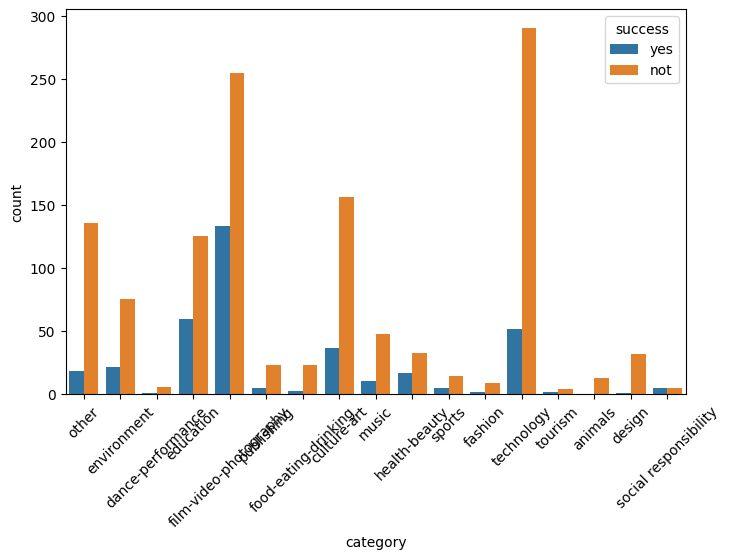

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data, x='category', hue='success', ax=ax)
ax.tick_params(axis='x', labelrotation=45)

<Axes: >

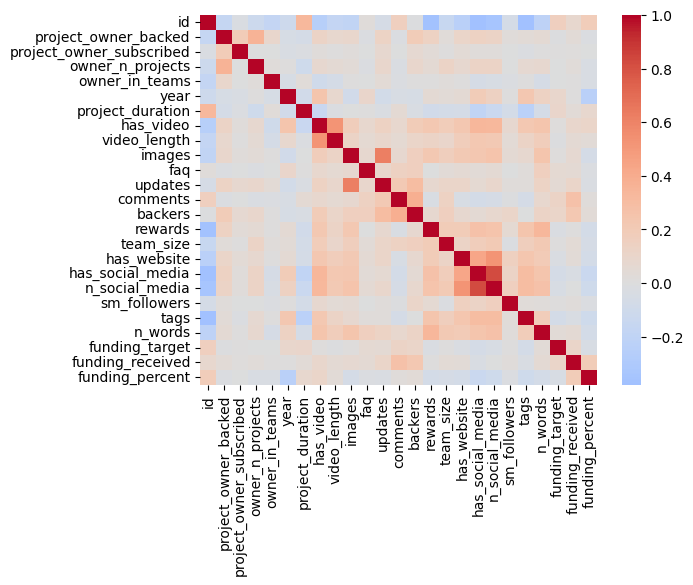

In [6]:
corr_maxtrix = data.corr(numeric_only=True)
sns.heatmap(corr_maxtrix, center=0, annot=False, cmap='coolwarm')

## Підготовка даних
Відокремлюємо цільову змінну - `success`.

Видалимо змінні, які є некорисними (id, імена людей, точні дати початку та завершення проекту) або занадто складними для обробки (описи та назви проектів, ознаки із високою кардинальністю). 

Також позбудемося ознак, які, так само як і цільова змінна, виражають результат краундфандингової кампанії: суму зібраних коштів, кількість підписників.

In [7]:
target_column = 'success'
y = data[target_column]
X = data.drop(columns=target_column)

Пропуски є лише в ознаці `region`. Знаючи, що серед значень цієї змінної є категорія `uncertain`, можемо застосувати її для порожніх значень.

In [8]:
X['region'] = X['region'].fillna('uncertain')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [10]:
drop_columns = ['id', 'project_start_date', 'project_name', 'location',
                'project_end_date', 'project_owner_name', 'description',
                'funding_received', 'funding_percent', 'backers', 'comments', 'sm_followers']

In [11]:
numeric_transformer = Pipeline(steps=[
    ('scaling', pp.StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('fill_region', FunctionTransformer(lambda x: x.fillna('uncertain'))),
#    ('encoding', pp.TargetEncoder())
    ('encoding', pp.OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(transformers=[
    ('numerical', numeric_transformer, make_column_selector(dtype_include=np.number)),
    ('categorical', categorical_transformer, make_column_selector(dtype_include=object)),
])

model = Pipeline(steps=[
    ('drop_columns', FunctionTransformer(lambda x: x.drop(columns=drop_columns))),
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(class_weight='balanced'))
])
model

Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function <lambda> at 0x0000025016236340>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002501624DB50>),
                                                 ('categorical',
                                                  Pipeline(steps=[('fill_region',
                                                                   FunctionTransformer(func=<function <lambda> at 0x00000250162362A0>)),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025016593BD0>)])),
                ('model', LogisticRegression(class_weight='balanced'))])

In [12]:
cross_validation = cross_val_score(
    model,
    X_train, 
    y_train,
    cv = 5,
    scoring='f1_weighted',
    n_jobs=-1)

cross_validation

array([0.80454935, 0.83459029, 0.79791972, 0.85765814, 0.78161422])

In [13]:
np.mean(cross_validation)

np.float64(0.8152663418776441)

In [14]:
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[301  74]
 [ 15  99]]
              precision    recall  f1-score   support

         not       0.95      0.80      0.87       375
         yes       0.57      0.87      0.69       114

    accuracy                           0.82       489
   macro avg       0.76      0.84      0.78       489
weighted avg       0.86      0.82      0.83       489



In [15]:
prediction_probabilities = model.predict_proba(X_test)
prediction_probabilities[:10]

array([[7.55242562e-01, 2.44757438e-01],
       [9.95995448e-01, 4.00455205e-03],
       [9.24705741e-01, 7.52942592e-02],
       [6.15926989e-01, 3.84073011e-01],
       [2.88555603e-07, 9.99999711e-01],
       [8.21553601e-01, 1.78446399e-01],
       [4.17175611e-01, 5.82824389e-01],
       [7.48241222e-01, 2.51758778e-01],
       [9.54295613e-01, 4.57043872e-02],
       [4.18181264e-01, 5.81818736e-01]])

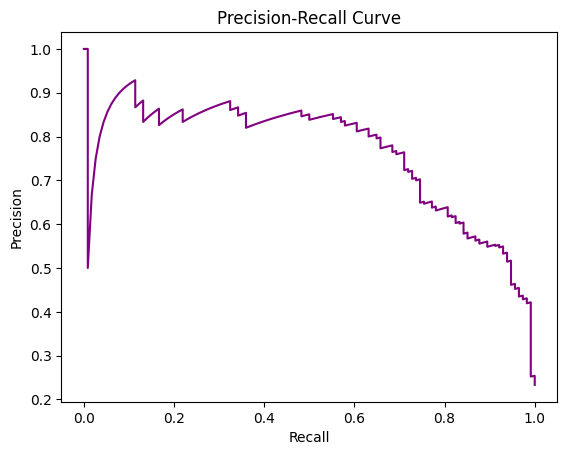

In [16]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
y_test_numbers = y_test.map({'yes': 1, 'not': 0})
precision, recall, thresholds = precision_recall_curve(y_test_numbers, prediction_probabilities[:, 1])

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

0.92


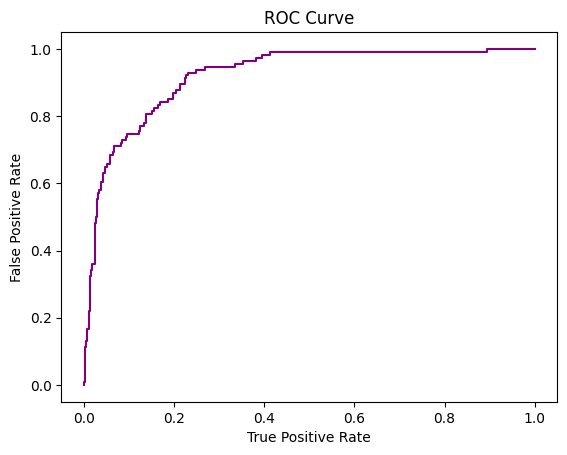

In [17]:

fpr, tpr, thresholds = roc_curve(y_test_numbers, prediction_probabilities[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('False Positive Rate')
ax.set_xlabel('True Positive Rate')
plt.show()